In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

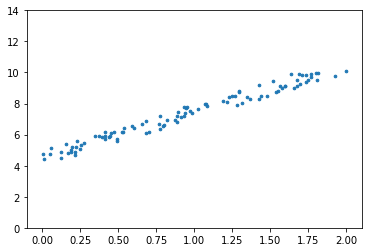

In [3]:
plt.scatter(X, y, s = 7)
plt.ylim(0, 14)
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.60272731],
       [2.88442066]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.60272731],
       [10.37156864]])

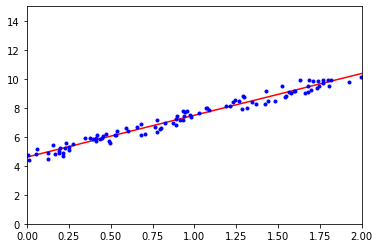

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# The equivalent code using Scikit-Learn 

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.60272731]), array([[2.88442066]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.60272731],
       [10.37156864]])

# Batch Gradient Descent 

In [10]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

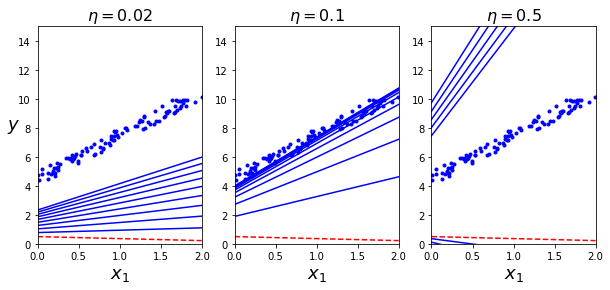

In [11]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

In [12]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.60272731],
       [2.88442066]])

# Stochastic Gradient Descent

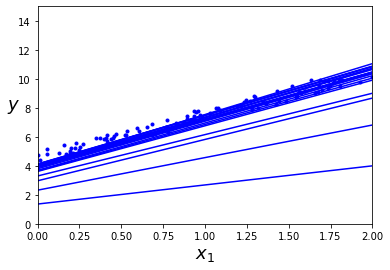

array([[4.59887947],
       [2.87809345]])

In [13]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                   # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style) 
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()       
        
theta

# Polynomial Regression

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

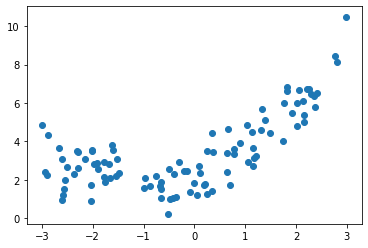

In [15]:
plt.scatter(X, y)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[2.15290063] [2.15290063 4.63498111]


In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.28405711]), array([[0.88171323, 0.44446033]]))